In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATA_DIR='/content/drive/MyDrive/APS360 Group/Data/'
hf = pd.concat([pd.read_csv(DATA_DIR+'hf_train.csv'), pd.read_csv(DATA_DIR+'hf_test.csv')]).drop(columns='Unnamed: 0')
md = pd.read_csv(DATA_DIR+'moody_clean.csv').drop(columns=['Unnamed: 0', 'index'])

In [4]:
lfn = []
for i, row in md.iterrows():
  artist, song = row['artist'], row['title']
  lfn.append('_'.join(artist.split())+'_'+'_'.join(song.split()))
md['lyrics_filename'] = pd.Series(lfn)

In [5]:
mood_to_num = {'happy': 0, 'sad': 1, 'angry':3, 'relaxed': 2}
md['mood_cats'] = md.mood.apply(lambda m: mood_to_num[m])

In [6]:
md = md.drop(columns=['mood', 'artist', 'title'])

In [7]:
df = pd.concat([md, hf]).drop_duplicates()

In [8]:
df.shape

(9729, 3)

In [9]:
import seaborn as sns

<Axes: xlabel='mood_cats', ylabel='Count'>

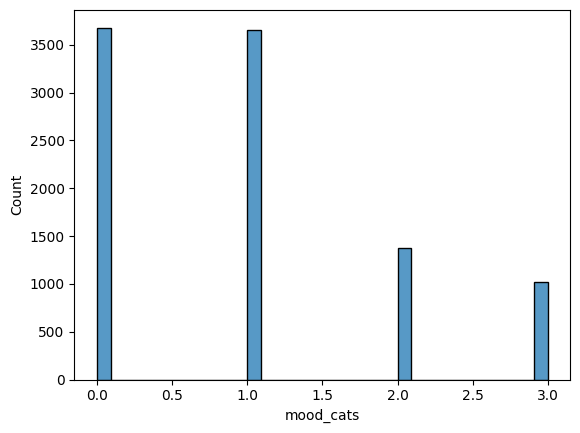

In [10]:
sns.histplot(df, x='mood_cats')

In [11]:
#lets under sample and get 1017 (number of angry) for each category

In [12]:
import numpy as np
np.random.seed(0)

happy = df[df['mood_cats'] == 0].sample(frac=1).reset_index(drop=True)[:1017]
sad = df[df['mood_cats'] == 1].sample(frac=1).reset_index(drop=True)[:1017]
calm = df[df['mood_cats'] == 2].sample(frac=1).reset_index(drop=True)[:1017]
angry = df[df['mood_cats'] == 3]

In [13]:
df = pd.concat([happy, sad, calm, angry]).drop(columns='lyrics_filename')

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='mood_cats', ylabel='Count'>

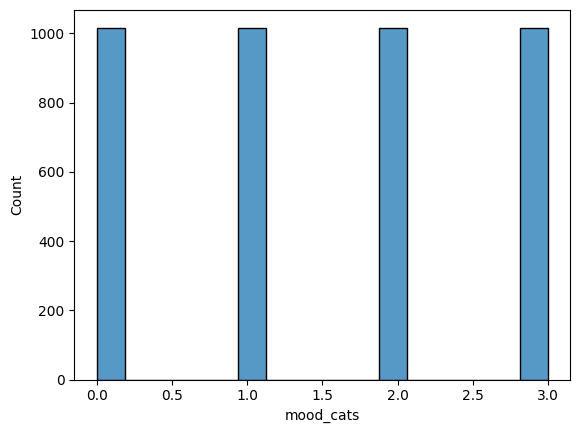

In [16]:
sns.histplot(df, x='mood_cats')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['lyrics'], df['mood_cats'], random_state=0, test_size=0.15)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

<Axes: xlabel='mood_cats', ylabel='Count'>

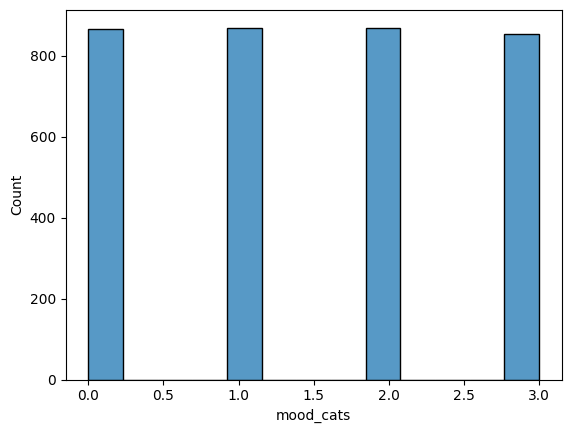

In [19]:
sns.histplot(train, x='mood_cats')

<Axes: xlabel='mood_cats', ylabel='Count'>

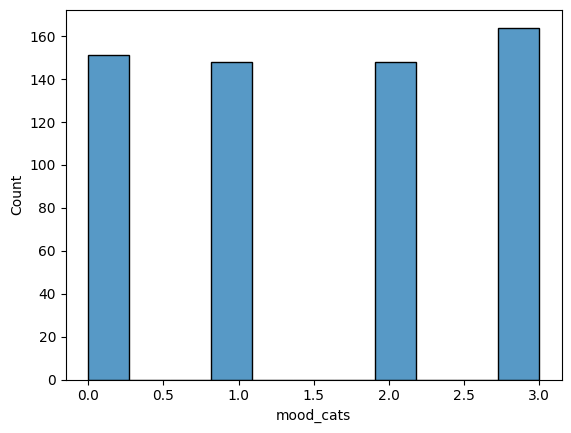

In [20]:
sns.histplot(test, x='mood_cats')

In [21]:
train.to_csv(DATA_DIR+"train.csv")
test.to_csv(DATA_DIR+"test.csv")